# WeatherPy
----

#### Analysis of Weather Across 500+ Cities
- As cities get closer to the equator (latitude of 0) maximum temperature rises. When looking at cities in the Southern hemisphere there is a clear upwards trend in maximum temperature as latitude rises to 0 degrees (r-squared is 0.32). Meanwhile, when looking at cities in the Northern hemisphere there is a clear downwards trend in maximum temperature as latitude rises and moves further away from 0 degrees (r-squared is 0.74).

- In both the Northern and the Southern hemispheres the r-squared value for the linear regression is very low, 0.048 and 0.098 respectively. This means that the level of correlation is low. Therefore, there are no clear trends showing any differences in cloudiness across latitudes.

- In the Northern hemisphere humidity increases as latitude increases, the r-squared value is 0.18. In the Southern hemisphere humidity also increases as latitude increases, the r-squared value is 0.03. The r-squared value in both hemispheres is low, therefore there is no strong correlation, humidity does not seem to change much as latitude changes.

- In the Northern hemisphere wind speed increases as latitude increases, r-squared is 0.01. In the Southern hemisphere wind speed decreases as latitude increases, r-squared is 0.13. The r-squared value in both hemispheres is low, showing that there is no strong correlation, wind speed does not change much as latitude changes.

In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
import sys
sys.path.insert(0, 'C:/Users/geral/OneDrive/Documents/GitHub/python-api-challenge')
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ImportError: DLL load failed while importing ft2font: The specified module could not be found.

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#create lists to store city names, and weather information
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#create variable called record to count the number of cities found in weather website in sets of 50 records
record = 0
#create variable called set to continue onto the next set when the set contains 50 cities
set = 1

print('Beginning Data Retrieval\n-----------------------------')

#create for loop to iterate through city list and find those cities in weather website
for city in cities:
    #look for city in weather website and store weather information in each variable's list
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        #if the record is smaller than 50 add 1 and the record of that city 
        if record <50:
            record +=1
        #if the record is 50 or larger reset to record number 0 and continue onto next set
        else:
            record = 0
            set +=1
        #show the current record and set numbers along with the city name
        print(f'Processing Record {record} of Set {set} | {city}')
    #if the city is not in the weather website show that the city is not found
    except:
        print('City not found. Skipping...')

print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')


Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | jumla
Processing Record 3 of Set 1 | tazovskiy
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | mirwah
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | kloulklubed
Processing Record 9 of Set 1 | kavieng
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | faya
Processing Record 13 of Set 1 | matamoros
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | sheregesh
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | robinson
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | lavrentiya
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#create dataframe that contains city names along with weather information, country and date
weather_check = pd.DataFrame({
    'City': city_list,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness': cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date' : date
})

#export the dataframe to a csv
weather_check.to_csv('C:/Users/geral/OneDrive/Documents/GitHub/python-api-challenge/WeatherPy/Resources/cities.csv', index=True)
weather_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alice Springs,-23.7000,133.8833,83.75,24,75,13.80,AU,1669617566
1,Jumla,29.2747,82.1838,64.49,21,0,6.17,NP,1669617544
2,Tazovsky,67.4667,78.7000,9.86,95,100,10.20,RU,1669617567
3,Busselton,-33.6500,115.3333,75.92,43,0,13.67,AU,1669617568
4,Bluff,-46.6000,168.3333,59.81,71,100,9.26,NZ,1669617568
...,...,...,...,...,...,...,...,...,...
557,Kīhei,20.7850,-156.4656,74.84,86,40,3.44,US,1669617866
558,Leh,34.1667,77.5833,24.84,45,0,1.54,IN,1669617866
559,Mayskiy,47.6931,40.1025,33.21,72,100,11.01,RU,1669617867
560,Sai Buri,6.7013,101.6168,85.71,71,41,7.74,TH,1669617868


In [ ]:
#create dataframe that displays the count, mean, standard deviation, minimum, maximmum and quantiles in weather information columns from weather_check dataframe
weather_df = pd.DataFrame(
    columns= ['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'],
    index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']    
)

#count the number of rows for weather information in weather_check
count = weather_check.count()

weather_df.loc['count'] = pd.Series({
    'Lat' : count[1],
    'Lng' : count[2],
    'Max Temp' : count[3],
    'Humidity' : count[4],
    'Cloudiness' : count[5],
    'Wind Speed' : count[6],
    'Date' : count[8]
})

#obtain the mean values for weather information in weather_check
weather_df.loc['mean'] = pd.Series(weather_check.mean())

#obtain the standard deviations for weather information in weather_check
weather_df.loc['std'] = pd.Series(weather_check.std())

#obtain the minimum for weather information in weather_check
min = weather_check.min()

weather_df.loc['min'] = pd.Series({
    'Lat' : min[1],
    'Lng' : min[2],
    'Max Temp' : min[3],
    'Humidity' : min[4],
    'Cloudiness' : min[5],
    'Wind Speed' : min[6],
    'Date' : min[8]
})

#obtain the quantile 25% values for weather information in weather_check
weather_df.loc['25%'] = pd.Series(weather_check.quantile(0.25))

#obtain the quantile 50% values for weather information in weather_check
weather_df.loc['50%'] = pd.Series(weather_check.quantile(0.5))

#obtain the quantile 75% values for weather information in weather_check
weather_df.loc['75%'] = pd.Series(weather_check.quantile(0.75))

#obtain the maximum for weather information in weather_check
max = weather_check.max()

weather_df.loc['max'] = pd.Series({
    'Lat' : max[1],
    'Lng' : max[2],
    'Max Temp' : max[3],
    'Humidity' : max[4],
    'Cloudiness' : max[5],
    'Wind Speed' : max[6],
    'Date' : max[8]
})

weather_df


C:\Users\geral\AppData\Local\Temp\ipykernel_29652\1361344528.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather_df.loc['mean'] = pd.Series(weather_check.mean())
C:\Users\geral\AppData\Local\Temp\ipykernel_29652\1361344528.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather_df.loc['std'] = pd.Series(weather_check.std())


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562,562,562,562,562,562,562
mean,19.357359,20.090579,55.14742,74.498221,61.558719,7.728043,1669617703.049822
std,32.689189,89.882066,29.070981,20.000557,40.703321,5.599931,103.436053
min,-54.8,-175.2,-42.72,11.0,0.0,0.0,1669617291.0
25%,-7.8271,-61.4797,35.8975,65.0,20.0,3.785,1669617627.0
50%,21.3964,25.4928,65.21,79.0,75.0,6.475,1669617711.5
75%,46.6424,98.880425,77.665,89.75,100.0,10.4375,1669617785.75
max,78.2186,179.3167,96.78,100.0,100.0,38.18,1669617868.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#create dataframe that contains only the rows with humidity equal to 100% or lower
weather_check_100 = weather_check[weather_check.Humidity <= 100]

weather_check_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alice Springs,-23.7000,133.8833,83.75,24,75,13.80,AU,1669617566
1,Jumla,29.2747,82.1838,64.49,21,0,6.17,NP,1669617544
2,Tazovsky,67.4667,78.7000,9.86,95,100,10.20,RU,1669617567
3,Busselton,-33.6500,115.3333,75.92,43,0,13.67,AU,1669617568
4,Bluff,-46.6000,168.3333,59.81,71,100,9.26,NZ,1669617568
...,...,...,...,...,...,...,...,...,...
557,Kīhei,20.7850,-156.4656,74.84,86,40,3.44,US,1669617866
558,Leh,34.1667,77.5833,24.84,45,0,1.54,IN,1669617866
559,Mayskiy,47.6931,40.1025,33.21,72,100,11.01,RU,1669617867
560,Sai Buri,6.7013,101.6168,85.71,71,41,7.74,TH,1669617868


In [ ]:
#create a dataframe to store count, mean, standard deviation, minimum, maximum and quantiles
weather_100_df = pd.DataFrame(
    columns= ['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'],
    index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']    
)

#count the number of rows for weather information
count = weather_check_100.count()

weather_100_df.loc['count'] = pd.Series({
    'Lat' : count[1],
    'Lng' : count[2],
    'Max Temp' : count[3],
    'Humidity' : count[4],
    'Cloudiness' : count[5],
    'Wind Speed' : count[6],
    'Date' : count[8]
})

#obtain the mean values for the weather information
weather_100_df.loc['mean'] = pd.Series(weather_check_100.mean())

#obtain the standard deviations of the weather information
weather_100_df.loc['std'] = pd.Series(weather_check_100.std())

#obtain the minima
min = weather_check_100.min()

weather_100_df.loc['min'] = pd.Series({
    'Lat' : min[1],
    'Lng' : min[2],
    'Max Temp' : min[3],
    'Humidity' : min[4],
    'Cloudiness' : min[5],
    'Wind Speed' : min[6],
    'Date' : min[8]
})

#obtain the 25% quantiles
weather_100_df.loc['25%'] = pd.Series(weather_check_100.quantile(0.25))
#obtain the 50% quantiles
weather_100_df.loc['50%'] = pd.Series(weather_check_100.quantile(0.5))
#obtain the 75% quantiles
weather_100_df.loc['75%'] = pd.Series(weather_check_100.quantile(0.75))

#obtain the maxima
max = weather_check_100.max()

weather_100_df.loc['max'] = pd.Series({
    'Lat' : max[1],
    'Lng' : max[2],
    'Max Temp' : max[3],
    'Humidity' : max[4],
    'Cloudiness' : max[5],
    'Wind Speed' : max[6],
    'Date' : max[8]
})

weather_100_df

C:\Users\geral\AppData\Local\Temp\ipykernel_29652\1693278362.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather_100_df.loc['mean'] = pd.Series(weather_check_100.mean())
C:\Users\geral\AppData\Local\Temp\ipykernel_29652\1693278362.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather_100_df.loc['std'] = pd.Series(weather_check_100.std())


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562,562,562,562,562,562,562
mean,19.357359,20.090579,55.14742,74.498221,61.558719,7.728043,1669617703.049822
std,32.689189,89.882066,29.070981,20.000557,40.703321,5.599931,103.436053
min,-54.8,-175.2,-42.72,11.0,0.0,0.0,1669617291.0
25%,-7.8271,-61.4797,35.8975,65.0,20.0,3.785,1669617627.0
50%,21.3964,25.4928,65.21,79.0,75.0,6.475,1669617711.5
75%,46.6424,98.880425,77.665,89.75,100.0,10.4375,1669617785.75
max,78.2186,179.3167,96.78,100.0,100.0,38.18,1669617868.0


In [ ]:
#  Get the indices of cities that have humidity over 100%
#create new dataframe to store dataframe containng all cities and the dataframe containing cities with humidity equal to or lower than 100%
weather_check_over100 = pd.concat([weather_check_100, weather_check], axis=0)
#drop all duplicates in the new dataframe
weather_check_over100 = weather_check_over100.drop_duplicates(keep=False)

#obtain the indices in new dataframe
index = weather_check_over100.index

print(index)

Int64Index([], dtype='int64')


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_check_clean = weather_check.drop(index, inplace=False)

weather_check_clean

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alice Springs,-23.7000,133.8833,83.75,24,75,13.80,AU,1669617566
1,Jumla,29.2747,82.1838,64.49,21,0,6.17,NP,1669617544
2,Tazovsky,67.4667,78.7000,9.86,95,100,10.20,RU,1669617567
3,Busselton,-33.6500,115.3333,75.92,43,0,13.67,AU,1669617568
4,Bluff,-46.6000,168.3333,59.81,71,100,9.26,NZ,1669617568
...,...,...,...,...,...,...,...,...,...
557,Kīhei,20.7850,-156.4656,74.84,86,40,3.44,US,1669617866
558,Leh,34.1667,77.5833,24.84,45,0,1.54,IN,1669617866
559,Mayskiy,47.6931,40.1025,33.21,72,100,11.01,RU,1669617867
560,Sai Buri,6.7013,101.6168,85.71,71,41,7.74,TH,1669617868


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

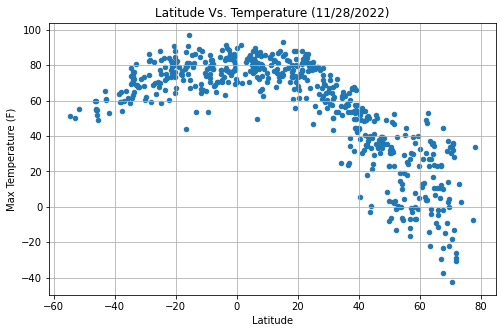

In [ ]:
#create a scatterplot showing latitude on x axis and maximum temperature on y axis
weather_check_clean.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,5),
              title="Latitude Vs. Temperature (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
#save the scatterplot as Fig1.png
plt.savefig('Fig1.png', facecolor='white')
plt.show()

## Latitude vs. Humidity Plot

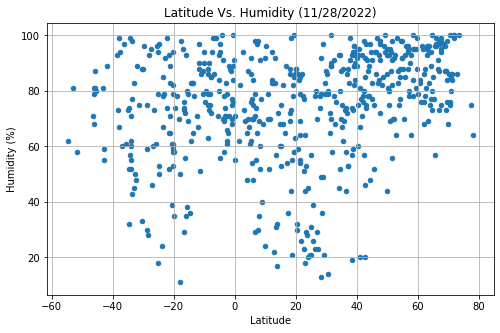

In [ ]:
#create a scatterplot showing latitude on x axis and humidity on y axis and store as Fig2.png
weather_check_clean.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,5),
              title="Latitude Vs. Humidity (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Fig2.png', facecolor='white')
plt.show()

## Latitude vs. Cloudiness Plot

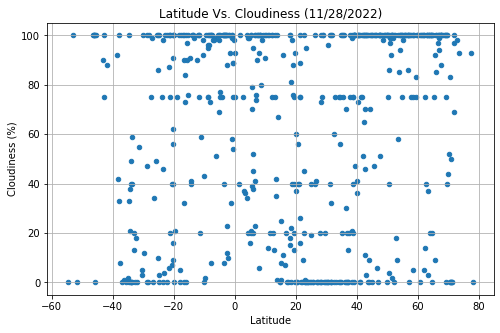

In [ ]:
#create a scatterplot showing latitude on x axis and cloudiness on y axis and store as Fig3.png
weather_check_clean.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,5),
              title="Latitude Vs. Cloudiness (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Fig3.png', facecolor='white')
plt.show()

## Latitude vs. Wind Speed Plot

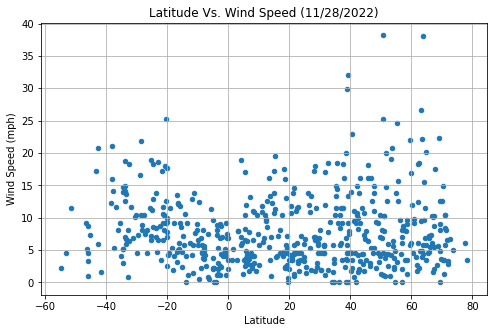

In [ ]:
#create a scatterplot showing latitude on x axis and wind speed on y axis and store as Fig4.png
weather_check_clean.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,5),
              title="Latitude Vs. Wind Speed (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Fig4.png', facecolor='white')
plt.show()

## Linear Regression

In [ ]:
#create dataframe containing only the weather information for cities in the northern hemisphere (latitude equal to or greater than 0)
weather_check_clean_north = weather_check_clean[weather_check_clean["Lat"]>=0]

#create dataframe containing only the weather information for cities in the southern hemisphere (latitude equal to or lower than 0)
weather_check_clean_south = weather_check_clean[weather_check_clean["Lat"]<=0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

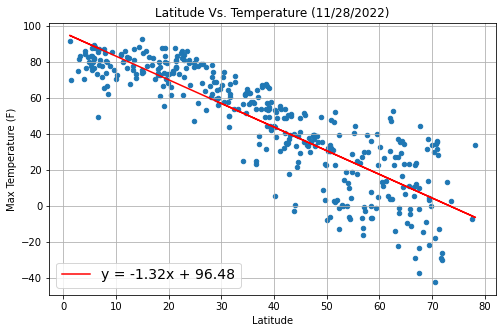

The r-value is: 0.7435907907195143


In [ ]:
#create a scatterplot showing latitude on x axis and maximum temperature on y axis in the northern hemisphere
weather_check_clean_north.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,5),
              title="Latitude Vs. Temperature (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#obtain the slope, intercept, r-value, p-value, and standard deviation using linear regression function
slope, int, r, p, std_err = linregress(weather_check_clean_north["Lat"], weather_check_clean_north["Max Temp"])
#use the slope, the latitudes and the intercept to create a fit line
fit = slope * weather_check_clean_north["Lat"] + int

#add the line on top of the scatterplot and create label to display the linear regression formula on the plot
plt.plot(weather_check_clean_north["Lat"],fit, color='red', label='y = {:.2f}x + {:.2f}'.format(slope, int))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.legend(fontsize=14, loc='lower left')
#save the plot as Fig5.png
plt.savefig('Fig5.png', facecolor='white')
plt.show()

#display the r-value
print(f'The r-value is: {r**2}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

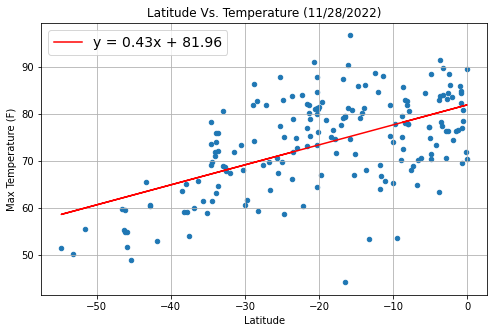

The r-value is: 0.3248648124487869


In [ ]:
#create a scatterplot showing latitude on x axis and maximum temperature on y axis in the southern hemisphere
weather_check_clean_south.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,5),
              title="Latitude Vs. Temperature (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#obtain the slope, intercept, r-value, p-value, and standard deviation using linear regression function
slope, int, r, p, std_err = linregress(weather_check_clean_south["Lat"], weather_check_clean_south["Max Temp"])
#use the slope, the latitudes and the intercept to create a fit line
fit = slope * weather_check_clean_south["Lat"] + int

#add the line on top of the scatterplot and create label to display the linear regression formula on the plot
plt.plot(weather_check_clean_south["Lat"],fit, color='red', label='y = {:.2f}x + {:.2f}'.format(slope, int))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.legend(fontsize=14, loc='upper left')
#save the plot as Fig6.png
plt.savefig('Fig6.png', facecolor='white')
plt.show()

#display the r-value
print(f'The r-value is: {r**2}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

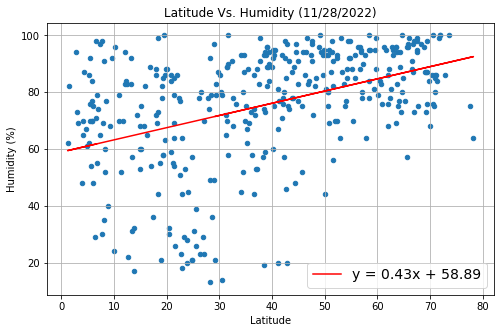

The r-value is: 0.1767890651997015


In [ ]:
#create a scatterplot showing latitude on x axis and humidity on y axis in the northern hemisphere
weather_check_clean_north.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,5),
              title="Latitude Vs. Humidity (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#obtain the slope, intercept, r-value, p-value, and standard deviation using linear regression function
slope, int, r, p, std_err = linregress(weather_check_clean_north["Lat"], weather_check_clean_north["Humidity"])
#use the slope, the latitudes and the intercept to create a fit line
fit = slope * weather_check_clean_north["Lat"] + int

#add the line on top of the scatterplot and create label to display the linear regression formula on the plot
plt.plot(weather_check_clean_north["Lat"],fit, color='red', label='y = {:.2f}x + {:.2f}'.format(slope, int))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(fontsize=14, loc='lower right')
#save the plot as Fig7.png
plt.savefig('Fig7.png', facecolor='white')
plt.show()

#display the r-value
print(f'The r-value is: {r**2}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

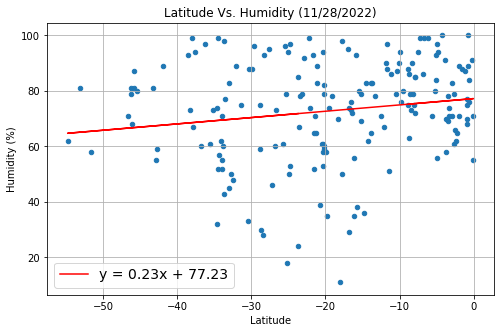

The r-value is: 0.027982588081132458


In [ ]:
#create a scatterplot showing latitude on x axis and humidity on y axis in the southern hemisphere
weather_check_clean_south.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,5),
              title="Latitude Vs. Humidity (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#obtain the slope, intercept, r-value, p-value, and standard deviation using linear regression function
slope, int, r, p, std_err = linregress(weather_check_clean_south["Lat"], weather_check_clean_south["Humidity"])
#use the slope, the latitudes and the intercept to create a fit line
fit = slope * weather_check_clean_south["Lat"] + int

#add the line on top of the scatterplot and create label to display the linear regression formula on the plot
plt.plot(weather_check_clean_south["Lat"],fit, color='red', label='y = {:.2f}x + {:.2f}'.format(slope, int))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(fontsize=14, loc='lower left')
#save the plot as Fig8.png
plt.savefig('Fig8.png', facecolor='white')
plt.show()

#display the r-value
print(f'The r-value is: {r**2}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

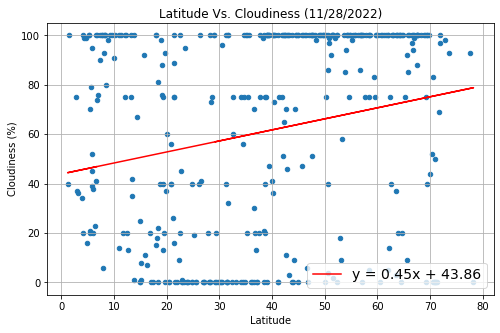

The r-value is: 0.048449663903657084


In [ ]:
#create a scatterplot showing latitude on x axis and cloudiness on y axis in the northern hemisphere
weather_check_clean_north.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,5),
              title="Latitude Vs. Cloudiness (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#obtain the slope, intercept, r-value, p-value, and standard deviation using linear regression function
slope, int, r, p, std_err = linregress(weather_check_clean_north["Lat"], weather_check_clean_north["Cloudiness"])
#use the slope, the latitudes and the intercept to create a fit line
fit = slope * weather_check_clean_north["Lat"] + int

#add the line on top of the scatterplot and create label to display the linear regression formula on the plot
plt.plot(weather_check_clean_north["Lat"],fit, color='red', label='y = {:.2f}x + {:.2f}'.format(slope, int))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(fontsize=14, loc='lower right')
#save the plot as Fig9.png
plt.savefig('Fig9.png', facecolor='white')
plt.show()

#display the r-value
print(f'The r-value is: {r**2}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

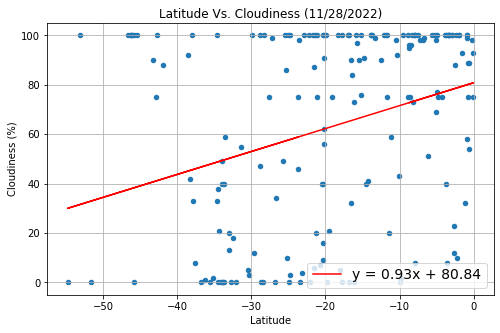

The r-value is: 0.09834310097684638


In [ ]:
#create a scatterplot showing latitude on x axis and cloudiness on y axis in the southern hemisphere
weather_check_clean_south.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,5),
              title="Latitude Vs. Cloudiness (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#obtain the slope, intercept, r-value, p-value, and standard deviation using linear regression function
slope, int, r, p, std_err = linregress(weather_check_clean_south["Lat"], weather_check_clean_south["Cloudiness"])
#use the slope, the latitudes and the intercept to create a fit line
fit = slope * weather_check_clean_south["Lat"] + int

#add the line on top of the scatterplot and create label to display the linear regression formula on the plot
plt.plot(weather_check_clean_south["Lat"],fit, color='red', label='y = {:.2f}x + {:.2f}'.format(slope, int))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(fontsize=14, loc='lower right')
#save the plot as Fig10.png
plt.savefig('Fig10.png', facecolor='white')
plt.show()

#display the r-value
print(f'The r-value is: {r**2}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

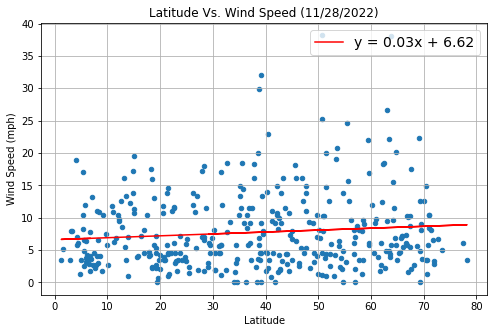

The r-value is: 0.010130967337824438


In [ ]:
#create a scatterplot showing latitude on x axis and wind speed on y axis in the northern hemisphere
weather_check_clean_north.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,5),
              title="Latitude Vs. Wind Speed (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#obtain the slope, intercept, r-value, p-value, and standard deviation using linear regression function
slope, int, r, p, std_err = linregress(weather_check_clean_north["Lat"], weather_check_clean_north["Wind Speed"])
#use the slope, the latitudes and the intercept to create a fit line
fit = slope * weather_check_clean_north["Lat"] + int

#add the line on top of the scatterplot and create label to display the linear regression formula on the plot
plt.plot(weather_check_clean_north["Lat"],fit, color='red', label='y = {:.2f}x + {:.2f}'.format(slope, int))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend(fontsize=14, loc='upper right')
#save the plot as Fig11.png
plt.savefig('Fig11.png', facecolor='white')
plt.show()

#display the r-value
print(f'The r-value is: {r**2}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

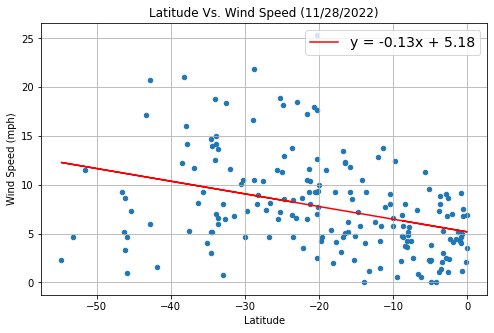

The r-value is: 0.12685710169190917


In [ ]:
#create a scatterplot showing latitude on x axis and wind speed on y axis in the southern hemisphere
weather_check_clean_south.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,5),
              title="Latitude Vs. Wind Speed (11/28/2022)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#obtain the slope, intercept, r-value, p-value, and standard deviation using linear regression function
slope, int, r, p, std_err = linregress(weather_check_clean_south["Lat"], weather_check_clean_south["Wind Speed"])
#use the slope, the latitudes and the intercept to create a fit line
fit = slope * weather_check_clean_south["Lat"] + int

#add the line on top of the scatterplot and create label to display the linear regression formula on the plot
plt.plot(weather_check_clean_south["Lat"],fit, color='red', label='y = {:.2f}x + {:.2f}'.format(slope, int))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend(fontsize=14, loc='upper right')
#save the plot as Fig12.png
plt.savefig('Fig12.png', facecolor='white')
plt.show()

#display the r-value
print(f'The r-value is: {r**2}')